# Retail Giant Sales Forecasting

## Business problem
**Global Mart is an online supergiant store that has worldwide operations. This store takes orders and delivers across the globe and deals with all the major product categories — consumer, corporate and home office.**<br/>
**As a sales manager for this store, you have to forecast the sales of the products for the next 6 months, so that you have a proper estimate and can plan your inventory and business processes accordingly.**

**The store dataset has the following 5 attributes and their data description is as given below:**

Attributes | Description
- | -
Order Date | The date on which the order was placed
Segment | The segment to which the product belongs
Market | The market to which the customer belongs
Sales | Total sales value of the transaction
Profit | Profit made on the transaction

**If you check the entries in the dataset, you will see that the store caters to 7 different geographical market segments and 3 major customer segments, i.e. consumer, corporate and home as can be seen in the table below.**

Market | Segment
- | -
Africa | Consumer
APAC (Asia Pacific) | Corporate
Canada | Home Office
EMEA(Middle East) | 
EU (European Union) | 
LATAM (Latin America) |  
US (United States) | 


## Reading and Understanding the Data

### Import the required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

### Import time series data: Global Superstore Data

In [3]:
#To display all the Columns
pd.set_option('display.max_columns', 40)

In [4]:
retail = pd.read_csv("Global+Superstore+Data.csv")

### Inspect the various aspects of the "retail" dataframe

In [5]:
# Check the head of the dataset (i.e. top 5 rows)
retail.head()

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


In [6]:
# Check the tail of the dataset (i.e last 5 rows)
retail.tail()

,Order Date,Segment,Market,Sales,Profit
51285,19-06-2014,Corporate,APAC,65.100,4.5000
51286,20-06-2014,Consumer,US,0.444,-1.1100
51287,02-12-2013,Home Office,US,22.920,11.2308
51288,18-02-2012,Home Office,LATAM,13.440,2.4000
51289,22-05-2012,Consumer,LATAM,61.380,1.8000


In [7]:
# Check the number of rows and columns in the dataset
retail.shape

(51290, 5)

In [8]:
# Check the data type of each column
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  51290 non-null  object 
 1   Segment     51290 non-null  object 
 2   Market      51290 non-null  object 
 3   Sales       51290 non-null  float64
 4   Profit      51290 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


In [9]:
retail.isnull().sum()

Order Date    0
Segment       0
Market        0
Sales         0
Profit        0
dtype: int64

**INFERENCE: There are no null values.**

In [10]:
# Check details of numerical columns
retail.describe()

,Sales,Profit
count,51290.000000,51290.000000
mean,246.490581,28.610982
std,487.565361,174.340972
min,0.444000,-6599.978000
25%,30.758625,0.000000
50%,85.053000,9.240000
75%,251.053200,36.810000
max,22638.480000,8399.976000


In [11]:
# Check number of unique values in each column
retail.nunique()

Order Date     1430
Segment           3
Market            7
Sales         22995
Profit        24575
dtype: int64

In [12]:
# To get column names 
retail.columns

Index(['Order Date', 'Segment', 'Market', 'Sales', 'Profit'], dtype='object')

## Data Visualization

In [13]:
# Created a function 'plotting' to plot a countplot for each of the categorical columns.

def plotting(data, column):
    
    data = data
    col = column
    
    sns.set_style('whitegrid')
    plt.figure(figsize=(12,8))
    sns.countplot(data[col])

    plt.show()

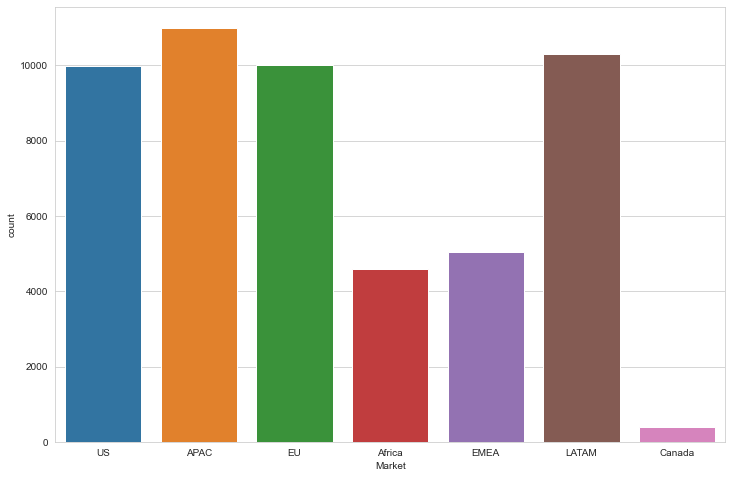

In [14]:
plotting(retail, 'Market')

In [15]:
retail.Market.value_counts()

APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: Market, dtype: int64

**INFERENCES:**
* **Count of sales is highest in APAC market.**
* **Count of sales is lowest in Canada market.**

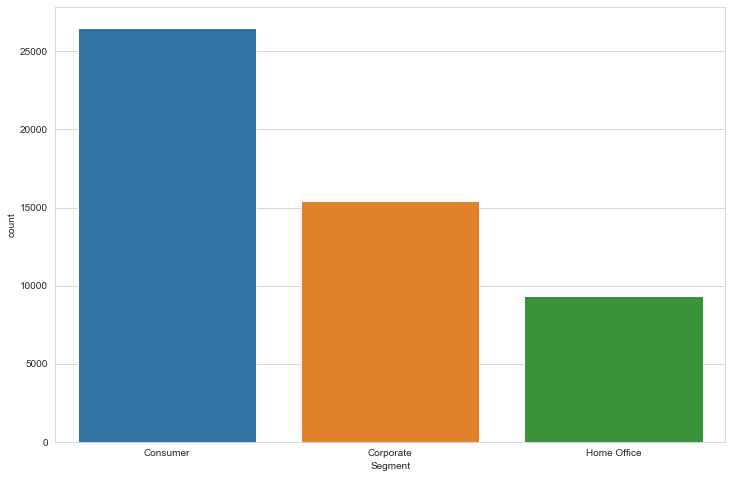

In [16]:
plotting(retail,'Segment')

In [17]:
retail.Segment.value_counts()

Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64

**INFERENCES:**
* **Sales count is highest in Consumer segment.**
* **Sales count is lowest in Home Office segment.**

### Profit in each Market-Segment

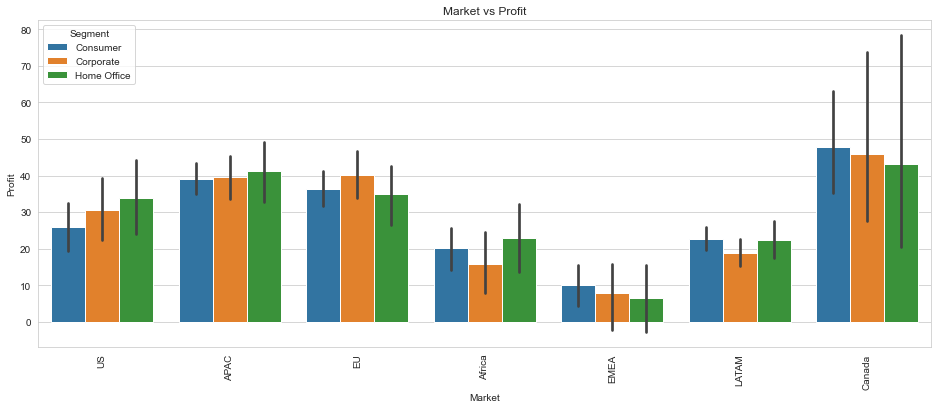

In [18]:
plt.figure(figsize=(16,6))
sns.barplot(x='Market', y= 'Profit', hue='Segment', data=retail)
plt.title('Market vs Profit')
plt.xticks(rotation=90)
plt.show()

**INFERENCES:**
* **Canada and APAC markets have more profit compared to other markets.**
* **EMEA market has the least profit.**

### Sales in each Market-Segment

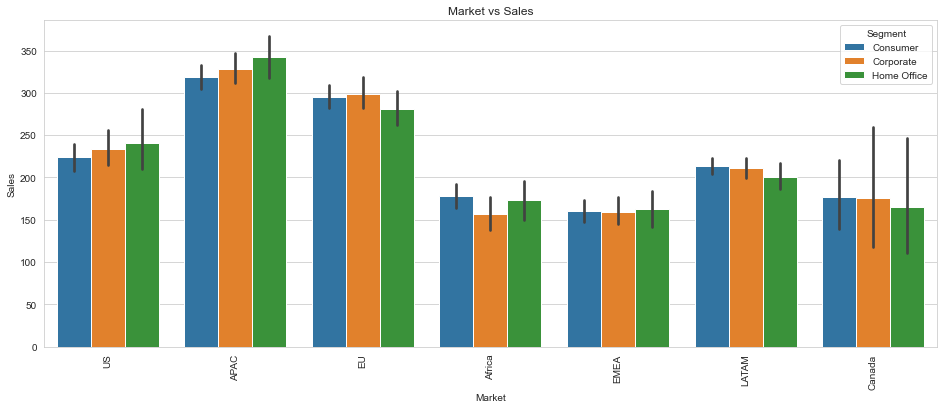

In [19]:
plt.figure(figsize=(16,6))
sns.barplot(x='Market', y= 'Sales', hue='Segment', data=retail)
plt.title('Market vs Sales')
plt.xticks(rotation=90)
plt.show()

**INFERENCES:**
* **APAC market has highest sales in all the segments.**
* **EMEA market has almost equal sales in all the 3 segments.**

## Data Preparation

In [20]:
# Convert Order Date column values into Year-Month format
retail['Order Date']  = pd.to_datetime(retail['Order Date']).dt.to_period('m')

In [21]:
# Create new column Market_Segment
retail['Market_Segment']= retail['Market']+'_'+retail['Segment']
retail.head()

,Order Date,Segment,Market,Sales,Profit,Market_Segment
0,2012-07,Consumer,US,2309.650,762.1845,US_Consumer
1,2013-05,Corporate,APAC,3709.395,-288.7650,APAC_Corporate
2,2013-10,Consumer,APAC,5175.171,919.9710,APAC_Consumer
3,2013-01,Home Office,EU,2892.510,-96.5400,EU_Home Office
4,2013-05,Consumer,Africa,2832.960,311.5200,Africa_Consumer


In [22]:
# Drop columns Market and Segment
retail=retail.drop(['Market','Segment'],axis=1)
retail.head()

,Order Date,Sales,Profit,Market_Segment
0,2012-07,2309.650,762.1845,US_Consumer
1,2013-05,3709.395,-288.7650,APAC_Corporate
2,2013-10,5175.171,919.9710,APAC_Consumer
3,2013-01,2892.510,-96.5400,EU_Home Office
4,2013-05,2832.960,311.5200,Africa_Consumer


In [23]:
# Check number of unique values in each column
retail.nunique()

Order Date           48
Sales             22995
Profit            24575
Market_Segment       21
dtype: int64

In [24]:
# Check the data type of each column
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype    
---  ------          --------------  -----    
 0   Order Date      51290 non-null  period[M]
 1   Sales           51290 non-null  float64  
 2   Profit          51290 non-null  float64  
 3   Market_Segment  51290 non-null  object   
dtypes: float64(2), object(1), period[M](1)
memory usage: 1.6+ MB


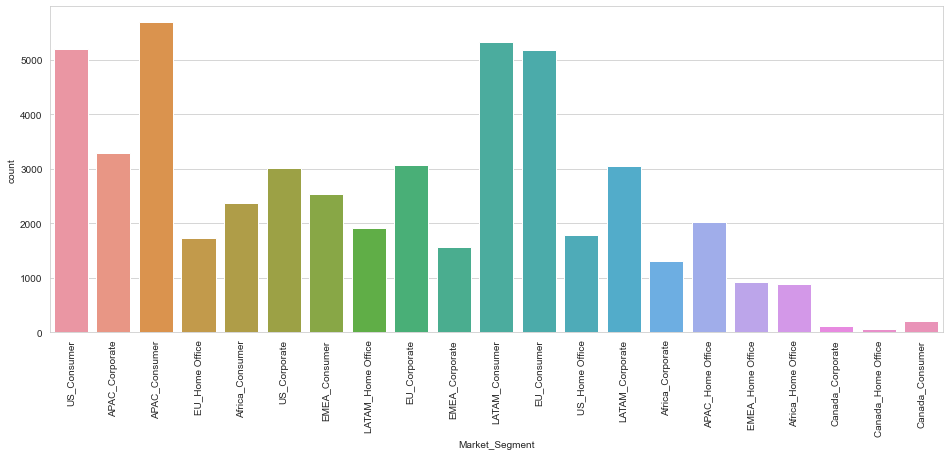

In [25]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,6))
sns.countplot(retail['Market_Segment'])
plt.xticks(rotation = 90)
plt.show()

In [26]:
retail.Market_Segment.value_counts()

APAC_Consumer         5699
LATAM_Consumer        5321
US_Consumer           5191
EU_Consumer           5186
APAC_Corporate        3283
EU_Corporate          3077
LATAM_Corporate       3053
US_Corporate          3020
EMEA_Consumer         2538
Africa_Consumer       2381
APAC_Home Office      2020
LATAM_Home Office     1920
US_Home Office        1783
EU_Home Office        1737
EMEA_Corporate        1574
Africa_Corporate      1312
EMEA_Home Office       917
Africa_Home Office     894
Canada_Consumer        202
Canada_Corporate       110
Canada_Home Office      72
Name: Market_Segment, dtype: int64

**INFERENCES:**
* **APAC_Consumer market-segment has the highest count.**
* **Canada_Home Office market-segment has the lowest count.**

### Part-A
**Find out the most consistently profitable Market_Segment**

In [27]:
retail_a = retail.pivot_table(index = 'Order Date', columns = 'Market_Segment', values = 'Profit', aggfunc = 'sum')
retail_a.head()

Market_Segment,APAC_Consumer,APAC_Corporate,APAC_Home Office,Africa_Consumer,Africa_Corporate,Africa_Home Office,Canada_Consumer,Canada_Corporate,Canada_Home Office,EMEA_Consumer,EMEA_Corporate,EMEA_Home Office,EU_Consumer,EU_Corporate,EU_Home Office,LATAM_Consumer,LATAM_Corporate,LATAM_Home Office,US_Consumer,US_Corporate,US_Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,-173.7264,230.2656,265.539,520.026,391.515,447.33,12.57,NaN,-2952.594,555.426,392.526,2259.8670,841.3875,2534.568,540.44312,1021.05924,-26.59744,2465.8368,643.3689,1233.9329
2011-02,4627.8531,3600.7776,617.5407,-201.888,-31.689,825.606,26.43,9.24,87.99,464.160,1067.562,368.070,-783.9945,2234.4060,162.255,1227.86616,814.03020,-356.80440,1853.5541,421.9256,553.9467
2011-03,2337.8319,3634.9365,205.1052,919.074,244.437,83.430,82.47,NaN,84.03,706.380,698.502,-15.570,1273.7100,2206.5960,269.745,2427.39612,178.66400,769.88400,204.2007,127.4696,-268.9314
2011-04,633.6423,90.7521,603.8478,381.315,941.751,417.618,55.08,6.51,NaN,121.353,178.314,-456.510,2980.0065,981.1470,130.371,1368.82948,872.64068,-554.22952,1434.8636,494.7315,2723.4358
2011-05,3838.9500,1028.4489,102.0315,-39.981,490.650,39.180,0.87,NaN,NaN,172.554,964.140,-33.591,673.0080,1719.0600,443.310,1749.39200,134.87252,-397.95600,833.9433,2912.7976,145.7781


In [28]:
retail_a.shape

(48, 21)

In [29]:
### Train-Test Split
train_len = 42
train_a = retail_a[0:train_len] # first 42 months as train set
test_a = retail_a[train_len:] # last 6 months as test set

In [30]:
cov=pd.DataFrame(columns = ['Segment', 'CoV'])
cov.head()

,Segment,CoV


In [31]:
for i in train_a.columns:
    t = {'Segment':i, 'CoV': np.std(train_a[i])/np.mean(train_a[i])}
    cov = cov.append(t, ignore_index = True)

In [32]:
cov.sort_values(by='CoV')

,Segment,CoV
0,APAC_Consumer,0.522725
1,APAC_Corporate,0.530051
12,EU_Consumer,0.595215
15,LATAM_Consumer,0.683770
13,EU_Corporate,0.722076
16,LATAM_Corporate,0.882177
14,EU_Home Office,0.938072
2,APAC_Home Office,1.008219
18,US_Consumer,1.010530
19,US_Corporate,1.071829


**INFERENCES:**
* **The ‘Coefficient of Variation’ (CoV) is a ratio of the standard deviation to mean. This value is used to find the most consistently profitable market-segment.**
* **The market-segment having the least CoV value is the most profitable market segment. The reason being that this market-segment is reliable as variation in profits is least. The lower the value of the coefficient of variation, the more precise the estimate would be.**
* **According to this, the ‘APAC_Consumer’ market segment has the lowest CoV value (0.522725). Hence, this market-segment is the most profitable market-segment.**

### Part-B
**Filter the Data for profitable Market Segment - APAC_Consumer**

In [33]:
# Create new dataframe retail_b and keep only that market segment which was found to be the most profitable.
retail_b = retail[retail['Market_Segment'] == 'APAC_Consumer']
retail_b.head()

,Order Date,Sales,Profit,Market_Segment
2,2013-10,5175.171,919.971,APAC_Consumer
6,2011-07,1822.080,564.840,APAC_Consumer
7,2012-04,5244.840,996.480,APAC_Consumer
14,2013-06,3701.520,1036.080,APAC_Consumer
29,2012-02,1878.720,582.360,APAC_Consumer


In [34]:
# Now we only need two columns: Order Date, Sales. Creating retail_data dataframe with these two columns.
retail_data = retail_b[['Order Date','Sales']]

In [35]:
retail_data.head()

,Order Date,Sales
2,2013-10,5175.171
6,2011-07,1822.080
7,2012-04,5244.840
14,2013-06,3701.520
29,2012-02,1878.720


In [36]:
retail_data = retail_data.groupby('Order Date').sum()

In [37]:
retail_data.head()

,Sales
Order Date,
2011-01,18821.9898
2011-02,23313.3531
2011-03,26518.4919
2011-04,12046.0923
2011-05,25941.9000


**We will now convert the Order Date column back to pandas date time format as we need to proceed with forecasting.**

In [38]:
retail_data = retail_data.to_timestamp()

In [39]:
retail_data.head()

,Sales
Order Date,
2011-01-01,18821.9898
2011-02-01,23313.3531
2011-03-01,26518.4919
2011-04-01,12046.0923
2011-05-01,25941.9000


## Time Series Analysis

### Plot time series data

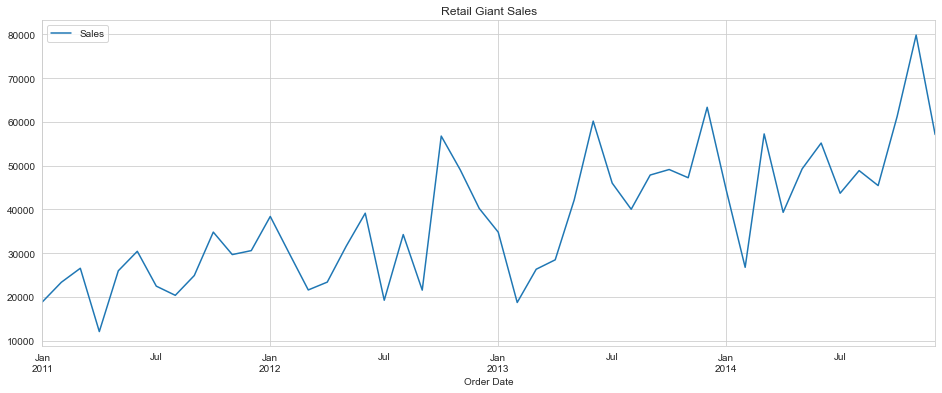

In [40]:
retail_data.plot(figsize=(16,6))
plt.legend(loc='best')
plt.title('Retail Giant Sales')
plt.show(block=False)

In [41]:
retail_data.isnull().sum()

Sales    0
dtype: int64

**INFERENCE: As there are no null values, no imputation required.**

### Outlier Detection
**Box plot and interquartile range**

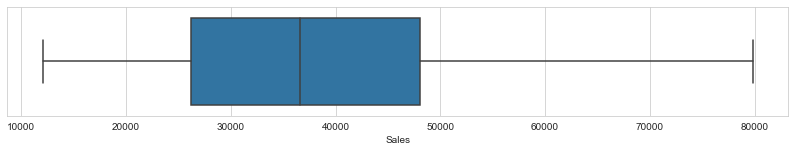

In [42]:
import seaborn as sns
fig = plt.subplots(figsize=(14, 2))
ax = sns.boxplot(x=retail_data['Sales'],whis=1.5)

### Histogram plot

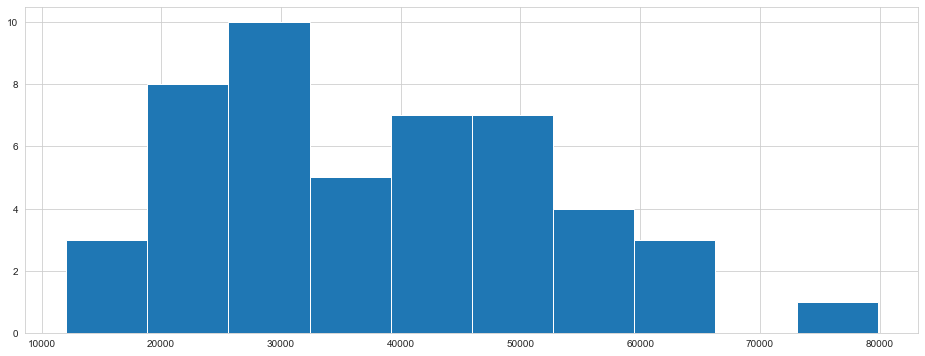

In [43]:
fig = retail_data.Sales.hist(figsize = (16,6))

## Time Series Decomposition
**Let's decompose the time series data to extract the below components and see them individually.**
* **Trend**
* **Seasonality**<br/>

**There are two ways in which the time series data can be decomposed:**
* **Additive Seasonal Decomposition**
* **Multiplicative Seasonal Decomposition**

### Additive Seasonal Decomposition

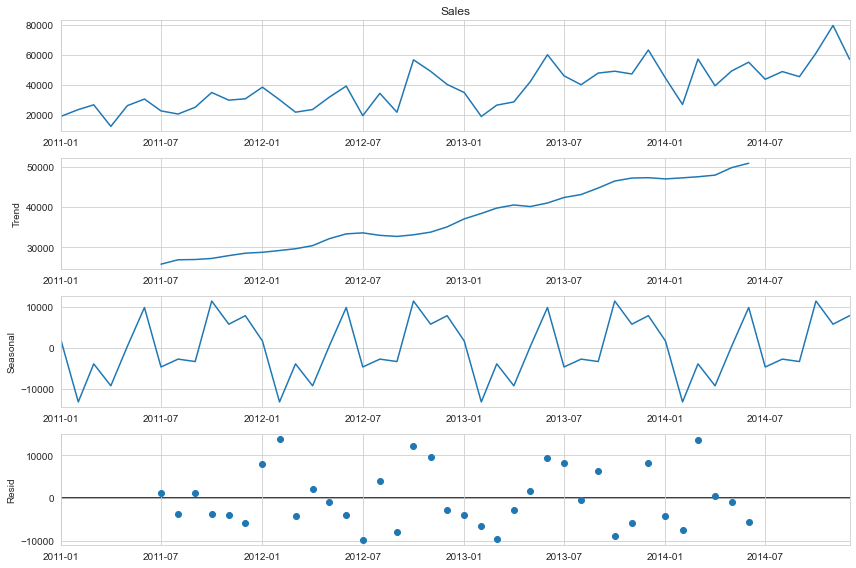

In [44]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(retail_data.Sales, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

### Multiplicative Seasonal Decomposition

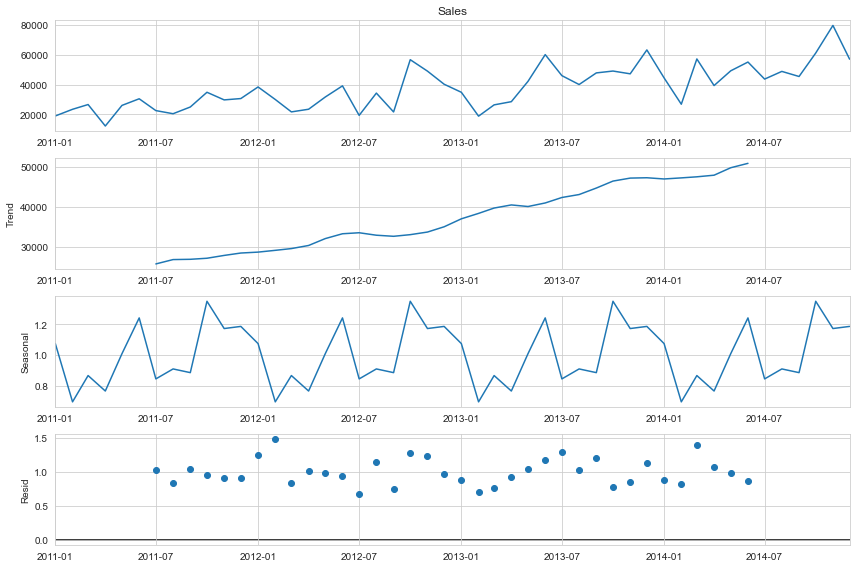

In [45]:
decomposition = sm.tsa.seasonal_decompose(retail_data.Sales, model='multiplicative') # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

**INFERENCES:**
* **This time series has an increasing trend as it is moving upwards.**
* **There is seasonality present as a pattern is repeating itself after a period of time.**

## Build and Evaluate Time Series Forecast

### Split time series data into training and test set

In [46]:
train_len = 42
train = retail_data[:train_len] # first 42 months as train set
test = retail_data[train_len:] # last 6 months as test set

In [47]:
train.shape

(42, 1)

In [48]:
test.shape

(6, 1)

## Simple Time Series Methods

### Naive method

In [49]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Sales'][train_len-1]

### Plot train, test and forecast

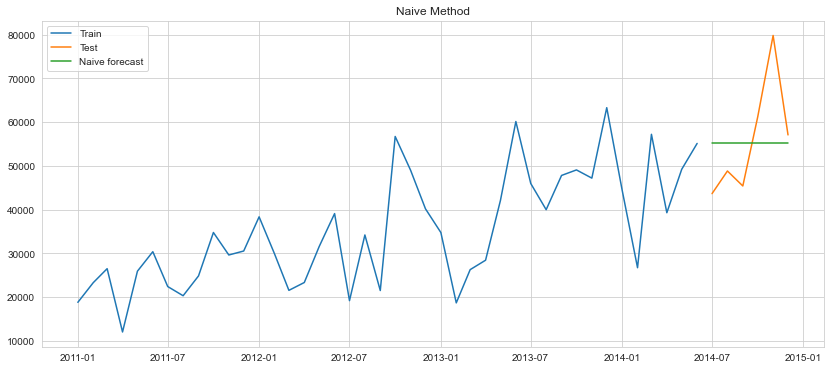

In [50]:
plt.figure(figsize=(14,6))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

### Calculate RMSE and MAPE

In [51]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_naive['naive_forecast'])/test['Sales'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47


**Inference from Naive method - The forecast for 6 months (green line) is same as the last observation on blue line. This is because the forecast is equal to the last month's sales in Naive method. It is not at all near to the test data (orange line). There is no trend or seasonality in the forecast.** 

## Simple average method

In [52]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Sales'].mean()

### Plot train, test and forecast

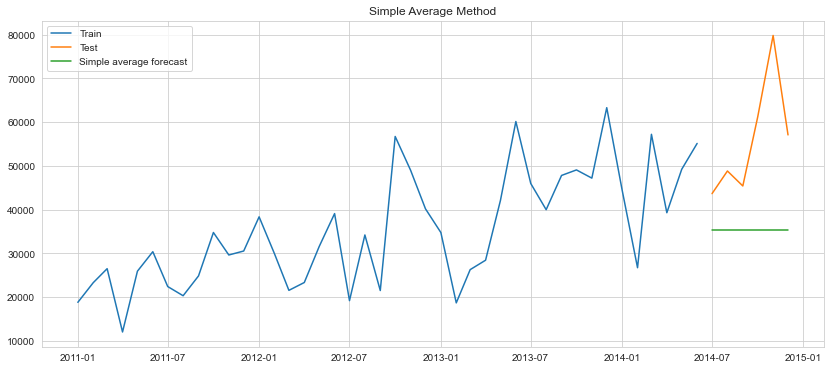

In [53]:
plt.figure(figsize=(14,6))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

### Calculate RMSE and MAPE

In [54]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_avg['avg_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34


**Inference from Simple Average method - The forecast for 6 months (green line) is equal to the average of all past months sales (blue line) in this method. It is not at all near to the test data (orange line). There is no trend or seasonality in the forecast.** 

## Simple moving average method

In [55]:
y_hat_sma = retail_data.copy()
ma_window = 3
y_hat_sma['sma_forecast'] = retail_data['Sales'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

### Plot train, test and forecast

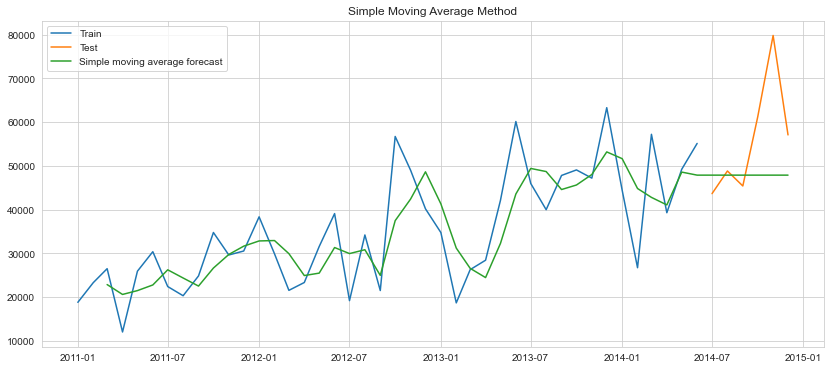

In [56]:
plt.figure(figsize=(14,6))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

### Calculate RMSE and MAPE

In [57]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sma['sma_forecast'][train_len:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82


**Inference from Simple moving average method - The forecast (green line) is the average of only the last few observations (blue line). It is not at all near to the test data (orange line). There is no trend or seasonality in the forecast.** 

# Exponential Smoothing Methods

## Simple exponential smoothing

In [58]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Sales'])
model_fit = model.fit(optimized=True)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(6)


C:\Users\Ruchika Desure\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


### Plot train, test and forecast

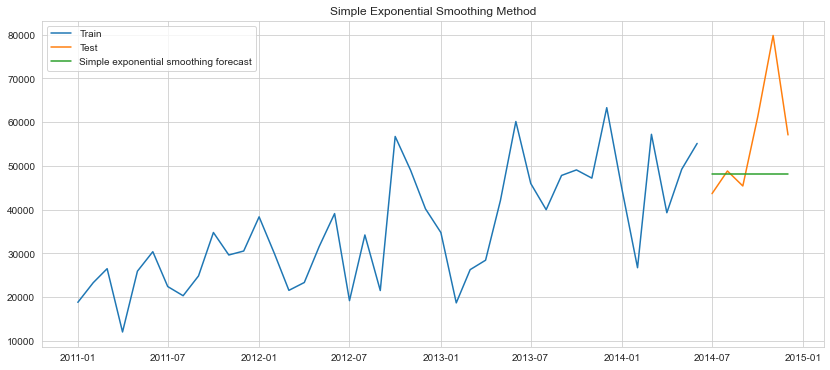

In [59]:
plt.figure(figsize=(14,6))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

### Calculate RMSE and MAPE

In [60]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ses['ses_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,14627.34,15.74


**Inference from Simple exponential smoothing method - This method helps us to forecast the level in the time series data. The forecast is not at all following the test data (orange line). There is no trend or seasonality in the forecast.** 

## Holt's method with trend

In [61]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 18821.989799999996, 'initial_trend': 4491.3633000000045, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

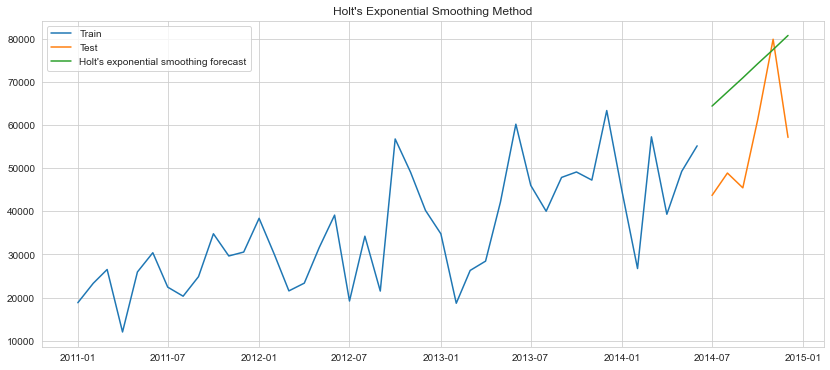

In [62]:
plt.figure(figsize=(14,6))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

### Calculate RSME and MAPE

In [63]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_holt['holt_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,14627.34,15.74
0,Holt's exponential smoothing method,18976.37,34.57


**Inference from Holt's exponential smoothing method - The forecast (green line) is moving upwards. Thus, this method has captured the trend as well in the time series data.** 

## Holt Winters' additive method with trend and seasonality

In [64]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.07571428571428572, 'smoothing_trend': 0.010816326530612248, 'smoothing_seasonal': 0.1026984126984127, 'damping_trend': nan, 'initial_level': 34110.965325000005, 'initial_trend': 730.4167145833339, 'initial_seasons': array([-15288.975525, -10797.612225,  -7592.473425, -22064.873025,
        -8169.065325,  -3712.033725, -11679.370425, -13779.891825,
        -9250.570425,    676.322775,  -4462.610625,  -3556.103925]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Ruchika Desure\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


### Plot train, test and forecast

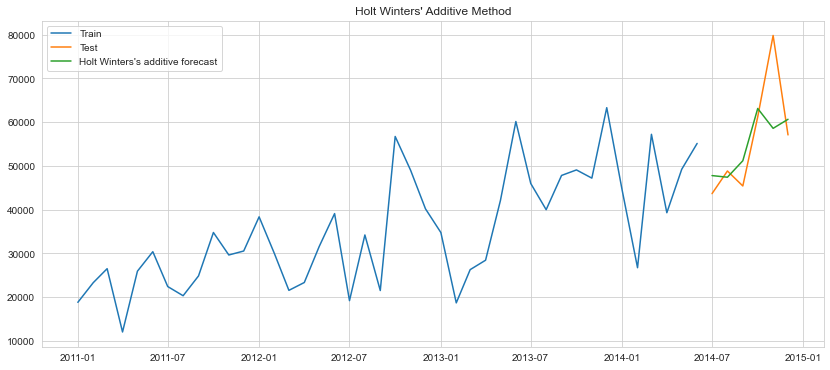

In [65]:
plt.figure(figsize=(14,6))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

### Calculate RMSE and MAPE

In [66]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwa['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,14627.34,15.74
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9306.82,10.17


**Inferences from Holt Winter's Additive smoothing method** 
* **The forecast (green line) is moving upwards. Thus, the trend has been captured. The forecast also has a good amount of Seasonality.**
* **The MAPE value is also the lowest compared to the MAPE value of previous methods. This means the errors are less in the predicted values by this method.**

## Holt Winter's multiplicative method with trend and seasonality

In [67]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.040357142857142855, 'smoothing_trend': 0.0001, 'smoothing_seasonal': 0.13709183673469388, 'damping_trend': nan, 'initial_level': 34110.965325000005, 'initial_trend': 730.4167145833339, 'initial_seasons': array([0.55178708, 0.68345627, 0.77741839, 0.35314428, 0.76051498,
       0.8911777 , 0.65760657, 0.5960275 , 0.72880948, 1.01982714,
       0.86917372, 0.89574895]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Ruchika Desure\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


### Plot train, test and forecast

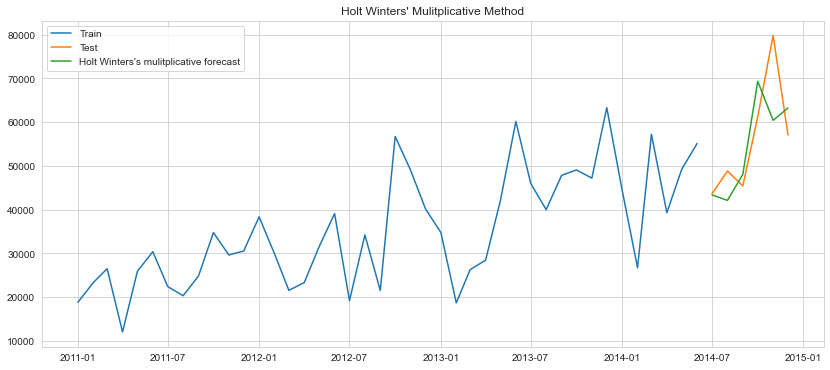

In [68]:
plt.figure(figsize=(14,6))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

### Calculate RMSE and MAPE

In [69]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwm['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,14627.34,15.74
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43


**Inferences from Holt Winter's Multiplicative smoothing method** 
* **The forecast (green line) is moving upwards. Thus, the trend has been captured even more than the additive method. The forecast also has a good amount of Seasonality.**
* **The MAPE value is a bit higher than that of the Holt Winter's Additive method but it is still lower than the MAPE value of other methods.**
* **Thus, the ‘Holt Winter’s Additive Method’ is able to predict the sales closer to the actual values.**

# Auto Regressive methods

## Stationarity vs non-stationary time series

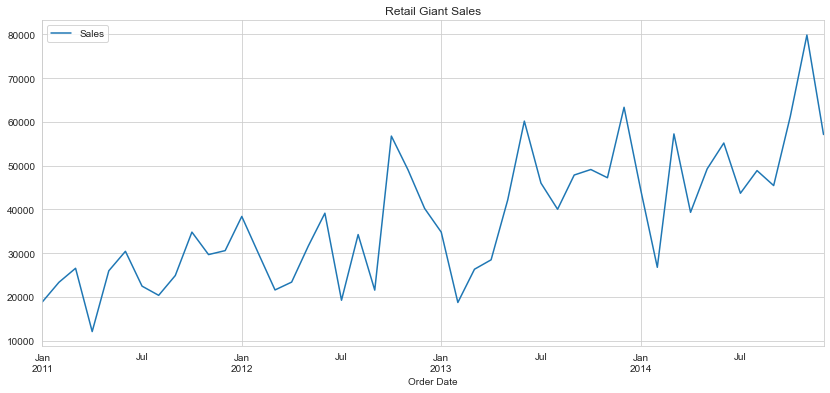

In [70]:
retail_data['Sales'].plot(figsize=(14, 6))
plt.legend(loc='best')
plt.title('Retail Giant Sales')
plt.show(block=False)

### Augmented Dickey-Fuller (ADF) test
* **Null Hypothesis (H0): The series is not stationary**
    * **p-value>0.05**
* **Alternate Hypothesis (H1): The series is stationary**
    * **p-value<=0.05**

In [71]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(retail_data['Sales'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -3.376024
Critical Values @ 0.05: -2.93
p-value: 0.011804


* **The p-value is 0.011804, which is less than 0.05**
* **So, the series is stationary.**

### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test
* **Null Hypothesis (H0): The series is stationary**
    * **p-value>0.05**
* **Alternate Hypothesis (H1): The series is not stationary**
    * **p-value<=0.05**

In [72]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(retail_data['Sales'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.577076
Critical Values @ 0.05: 0.46
p-value: 0.024720


* **The p-value is 0.024720, which is less than 0.05**
* **So, the series is not stationary. Reject the Null Hypothesis (H0).**

### Box Cox Transformation to make variance constant

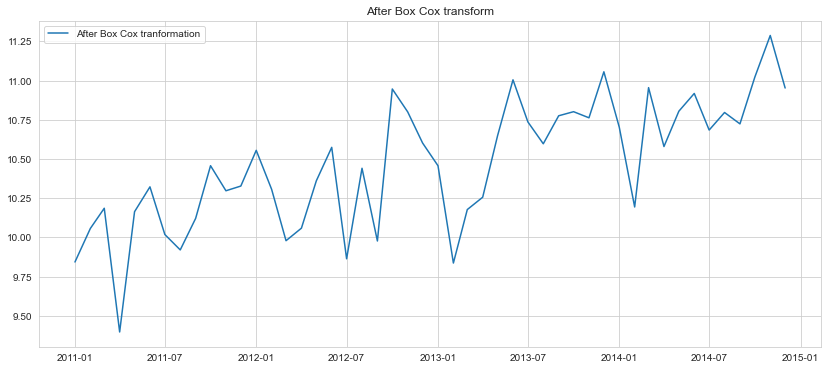

In [73]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(retail_data['Sales'], lmbda=0), index = retail_data.index)

plt.figure(figsize=(14,6))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

### Differencing to remove trend

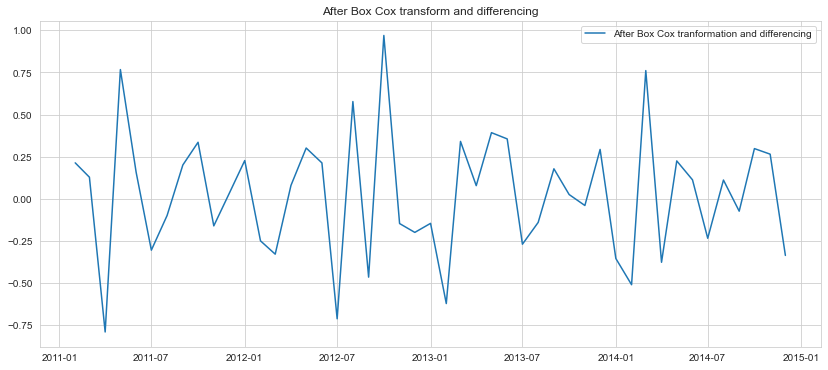

In [74]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), retail_data.index)
plt.figure(figsize=(14,6))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

**Differencing has stabilized the mean and therefore removed the trend from the time series.**

In [75]:
data_boxcox_diff.dropna(inplace=True)

In [76]:
data_boxcox_diff.tail()

Order Date
2014-08-01    0.112012
2014-09-01   -0.072673
2014-10-01    0.298459
2014-11-01    0.265449
2014-12-01   -0.335151
Freq: MS, dtype: float64

### Augmented Dickey-Fuller (ADF) test

In [77]:
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -4.535011
Critical Values @ 0.05: -2.95
p-value: 0.000170


### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [78]:
kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.156456
Critical Values @ 0.05: 0.46
p-value: 0.100000


C:\Users\Ruchika Desure\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


**As we can see that the p-value is now greater than 0.05 and therefore the time series is now stationary.**

In [79]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

In [80]:
train_data_boxcox_diff

Order Date
2011-02-01    0.214000
2011-03-01    0.128816
2011-04-01   -0.789102
2011-05-01    0.767119
2011-06-01    0.158548
2011-07-01   -0.303937
2011-08-01   -0.098320
2011-09-01    0.201126
2011-10-01    0.335976
2011-11-01   -0.159845
2011-12-01    0.030117
2012-01-01    0.227734
2012-02-01   -0.248683
2012-03-01   -0.327663
2012-04-01    0.079944
2012-05-01    0.301872
2012-06-01    0.213622
2012-07-01   -0.710884
2012-08-01    0.577494
2012-09-01   -0.463894
2012-10-01    0.969434
2012-11-01   -0.146063
2012-12-01   -0.198531
2013-01-01   -0.144942
2013-02-01   -0.620558
2013-03-01    0.341112
2013-04-01    0.078691
2013-05-01    0.392955
2013-06-01    0.355907
2013-07-01   -0.268628
2013-08-01   -0.139388
2013-09-01    0.178702
2013-10-01    0.026014
2013-11-01   -0.038982
2013-12-01    0.293485
2014-01-01   -0.353341
2014-02-01   -0.508883
2014-03-01    0.761118
2014-04-01   -0.375717
2014-05-01    0.225410
2014-06-01    0.113222
Freq: MS, dtype: float64

**We will directly use p=1, q=1, d=1 as the forcasts are relatively better for these values.** 

## Auto regression method (AR)
* **The Autoregressive model predicts the future observation as linear regression of one or more past observations.**
* **This model forecasts the dependent variable (future observation) when one or more independent variables are known (past observations).**
* **This model has a parameter ‘p’ called lag order.**
* **Lag order is the maximum number of lags used to build ‘p’ number of past data points to predict future data points.**

In [81]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

const      0.024255
ar.L1.y   -0.406729
dtype: float64


### Recover original time series

In [82]:
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

### Plot train, test and forecast

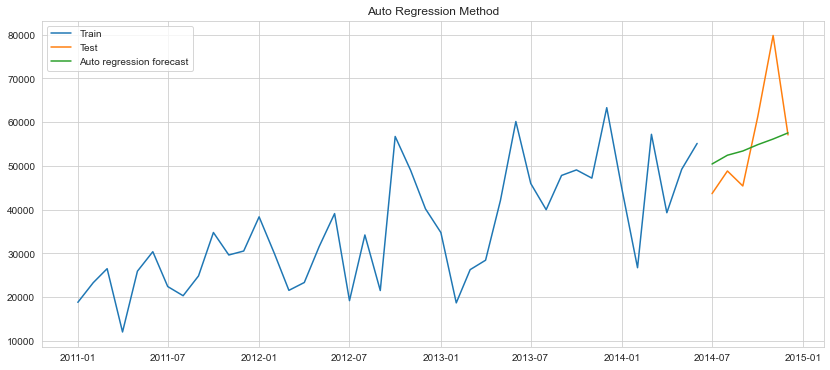

In [83]:
plt.figure(figsize=(14,6))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

**INFERENCE: The Auto Regression method has captured trend in the forecast (green line) but not the seasonality (as seen in orange line).**

### Calculate RMSE and MAPE

In [84]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ar['ar_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,14627.34,15.74
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56


**INFERENCE: The RMSE and MAPE values have increased for the AR method.**

## Moving average method (MA)

In [85]:
model = ARIMA(train_data_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)

const      0.021415
ma.L1.y   -1.000000
dtype: float64


### Recover original time series

In [86]:
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

### Plot train, test and forecast

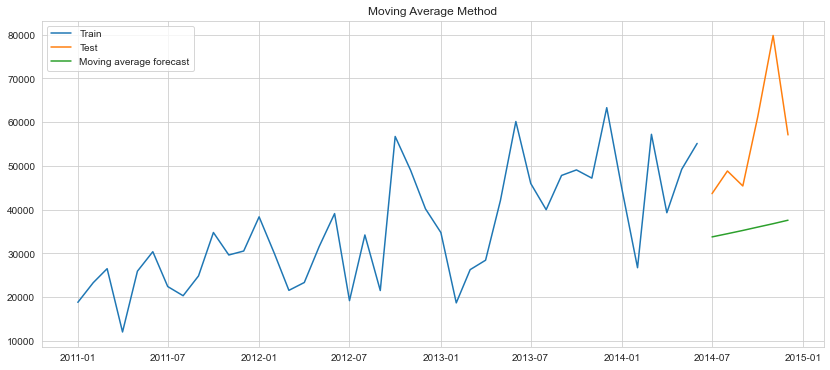

In [87]:
plt.figure(figsize=(14,6))
plt.plot(retail_data['Sales'][:train_len], label='Train')
plt.plot(retail_data['Sales'][train_len:], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

**INFERENCE: The Moving Average method has captured trend in the forecast (green line) but not the seasonality (as seen in orange line).**

### Calculate RMSE and MAPE

In [88]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ma['ma_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,14627.34,15.74
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93


**INFERENCE: The RMSE and MAPE values have increased for the Moving Average method. There are many errors in the predicted values.**

## Auto regression moving average method (ARMA)

In [89]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

const      0.02147
ar.L1.y    0.07458
ma.L1.y   -1.00000
dtype: float64


### Recover original time series

In [90]:
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

### Plot train, test and forecast

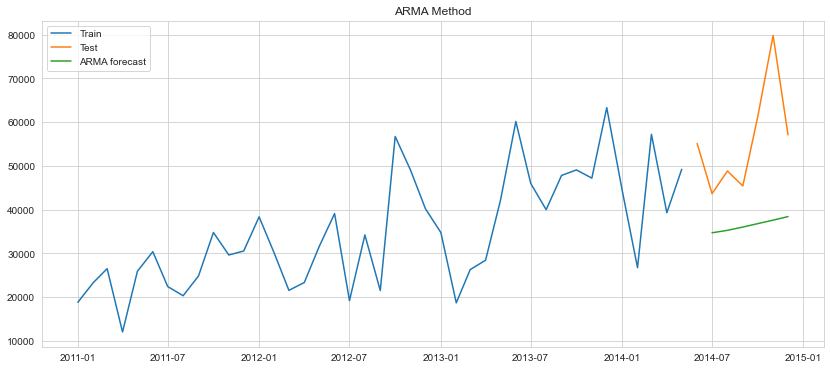

In [91]:
plt.figure(figsize=(14,6))
plt.plot(retail_data['Sales'][:train_len-1], label='Train')
plt.plot(retail_data['Sales'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

**INFERENCE:**
* **The time series is modelled using an ARMA(p,q) model.**
* **From the plot we can see that the model has captured the trend in the forecast (green line) but not the seasonality.**

### Calculate RMSE and MAPE

In [92]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arma['arma_forecast'][train_len-1:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,14627.34,15.74
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93
0,Autoregressive moving average (ARMA) method,22654.32,32.40


**INFERENCE: The RMSE and MAPE values are high for the Auto Regressive Moving Average (ARMA) method. There are many errors in the predicted values by this model.**

## Auto regressive integrated moving average (ARIMA)

In [93]:
model = ARIMA(train_data_boxcox, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.params)

const        0.02147
ar.L1.D.y    0.07458
ma.L1.D.y   -1.00000
dtype: float64


### Recover original time series forecast

In [94]:
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

### Plot train, test and forecast

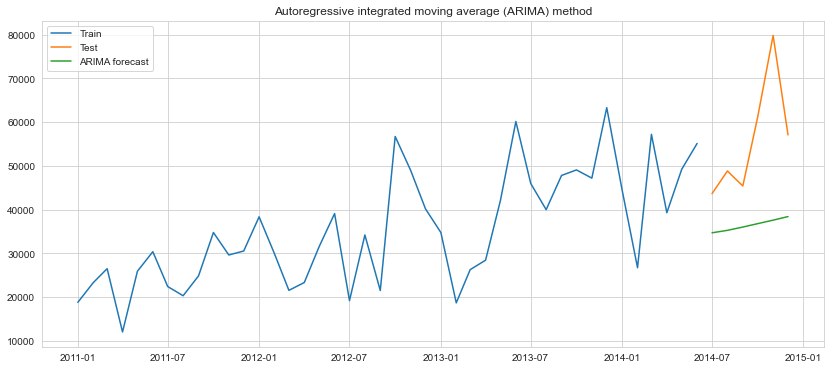

In [95]:
plt.figure(figsize=(14,6))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

**INFERENCE: From the plot we can see that the model has not captured the seasonality in the forecast (green line).**

### Calculate RMSE and MAPE

In [96]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arima['arima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,14627.34,15.74
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93
0,Autoregressive moving average (ARMA) method,22654.32,32.40


**INFERENCE: The RMSE and MAPE values are high for the Auto Regressive Integrated Moving Average (ARIMA) method. There are many errors in the predicted values by this model.**

## Seasonal auto regressive integrated moving average (SARIMA)

In [97]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()
print(model_fit.params)

ar.L1      -0.041707
ma.L1      -0.996527
ar.S.L12    0.099600
ma.S.L12   -0.966989
sigma2      0.058539
dtype: float64


### Recover original time series forecast

In [98]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

### Plot train, test and forecast

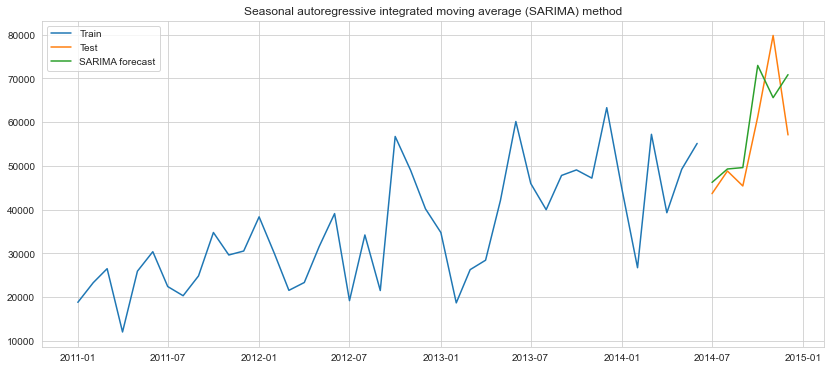

In [99]:
plt.figure(figsize=(14,6))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

**INFERENCE: The SARIMA model has captured the trend as well as the seasonality in the forecast (green line).**

### Calculate RMSE and MAPE

In [100]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,14627.34,15.74
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93
0,Autoregressive moving average (ARMA) method,22654.32,32.40


**INFERENCES:**
* **The RMSE and MAPE values are low for the Seasonal Auto Regressive Integrated Moving Average (SARIMA) model.** 
* **It is the lowest among the ARIMA set of techniques.**
* **SARIMA model has the lowest MAPE value among the ARIMA set of techniques. Thus, the ‘SARIMA model’ is able to predict the sales closer to the actual values.**

## Conclusion

* **The ‘Naive method’ and the ‘Simple moving average method’ does not work well for this time series because the data has a seasonal component and there are more than 10 observations. The forecast tends to under predict or over predict the values.**
* **When there are more than 10 observations in the data and we need to capture the level, the trend and seasonality, the Holt-Winters’ exponential smoothing technique and or the SARIMA works best.**
* **From the plots and the MAPE values of all the methods, we can conclude that,**
    * **Holt Winter’s additive method is the best forecasting method in the smoothing techniques.**
    * **Seasonal Autoregressive Integrated Moving Average (SARIMA) is the best method in ARIMA set of techniques.**
    * **These two are able to predict the sales closer to the actual values.**